## Decision Tree Regressor

#### What is a Decision Tree?

The algorithm uses a tree-like structure for decisions to either predict the target value (regression) or predict the target class (classification). Before diving into how decision trees work, let us become familiar with the basic structure and terminologies of a decision tree:

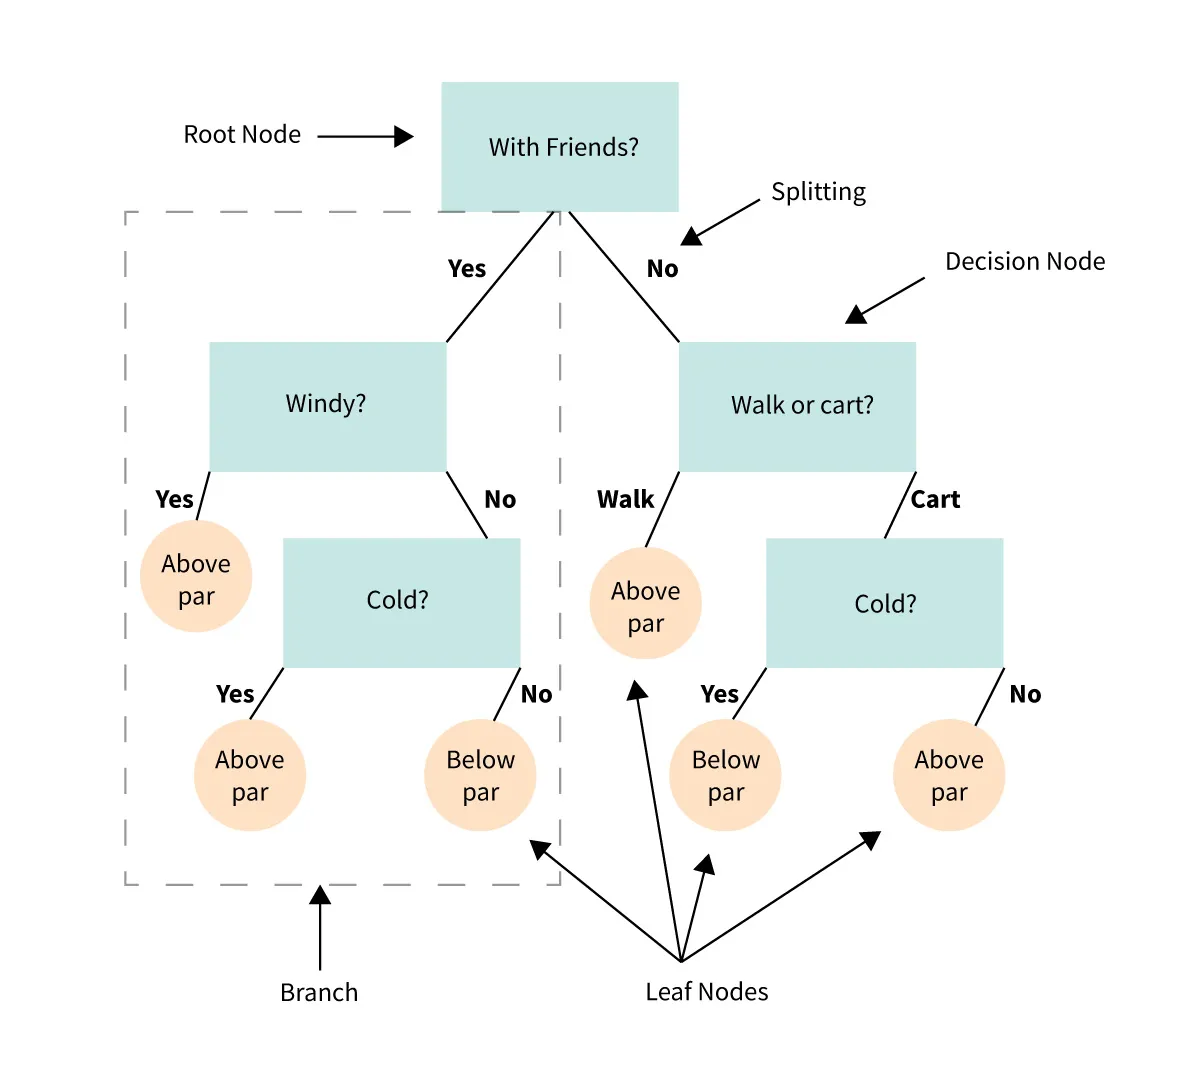


* **Root Node**: The topmost node representing all data points.
* **Splitting**: It refers to dividing a node into two or more sub-nodes.
* **Decision Node**: Nodes further split into sub-nodes; a split node.
* **Leaf / Terminal Node**:  Nodes that do not split; final results.
* **Branch / Sub-Tree**:  Subsection of the entire tree.
* **Parent and Child Node**: Parent node divides into sub-nodes; children are the sub-nodes.

* **Pruning**: Removing sub-nodes of a decision node is called pruning. Pruning is often done in decision trees to prevent overfitting.

#### Decision Tree Regressor

Decision trees where the target variable or the terminal node can take continuous values (typically real numbers) are called regression trees.

#### What does Decision Tree Regressor do?

A Decision Tree Regressor observes the features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

#### What is the difference between a decision tree regressor and a classifier?

Classification trees are used to predict categorical data (yes, no), while regression trees are used to predict numerical data, such as the price of a stock. 

Classification and regression trees are powerful tools for analyzing data.

*Let's explore these in detail with real-life dataset.*

#### Problem Statement

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States 2010. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

#### Data Importing and Understanding

In [1]:
import pandas as pd
acme_data = pd.read_csv("./data/acme_dataset.csv")
acme_data.info()

In [8]:
acme_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [30]:
from sklearn.model_selection import train_test_split
train_inputs,test_inputs,train_target,test_target = train_test_split(acme_data.drop(columns=["charges"]), acme_data["charges"], test_size=0.2, random_state=42)

In [32]:
print(train_inputs.shape)
print(train_target.shape)

(1070, 6)
(1070,)


#### One-Hot Encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
categorical_columns = train_inputs.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse=False, drop='first')  
encoder.fit(train_inputs[categorical_columns])

train_inputs_encoded = encoder.transform(train_inputs[categorical_columns])
train_inputs_encoded_df = pd.DataFrame(train_inputs_encoded, columns=encoder.get_feature_names_out(categorical_columns))
train_inputs = train_inputs.drop(columns=categorical_columns).reset_index(drop=True)
train_inputs = pd.concat([train_inputs, train_inputs_encoded_df], axis=1)
train_inputs

c:\Users\adiag\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      46  19.950         2       0.0         0.0               1.0   
1      47  24.320         0       0.0         0.0               0.0   
2      52  24.860         0       0.0         0.0               0.0   
3      39  34.320         5       0.0         0.0               0.0   
4      54  21.470         3       0.0         0.0               1.0   
...   ...     ...       ...       ...         ...               ...   
1065   18  31.350         4       0.0         0.0               0.0   
1066   39  23.870         5       0.0         0.0               0.0   
1067   58  25.175         0       1.0         0.0               0.0   
1068   37  47.600         2       0.0         1.0               0.0   
1069   55  29.900         0       1.0         0.0               0.0   

      region_southeast  region_southwest  
0                  0.0               0.0  
1                  0.0               0.0  
2                  1.0               0.0  
3                  1.0               0.0  
4                  0.0               0.0  
...                ...               ...  
1065               0.0               0.0  
1066               1.0               0.0  
1067               0.0               0.0  
1068               0.0               1.0  
1069               0.0               1.0  

[1070 rows x 8 columns]

In [44]:
test_inputs_encoded = encoder.transform(test_inputs[categorical_columns])
train_target_encoded_df = pd.DataFrame(test_inputs_encoded, columns=encoder.get_feature_names_out(categorical_columns))
test_inputs = test_inputs.drop(columns=categorical_columns).reset_index(drop=True)
test_inputs = pd.concat([test_inputs, train_target_encoded_df], axis=1)
test_inputs

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0     45  25.175         2       0.0         0.0               0.0   
1     36  30.020         0       0.0         0.0               1.0   
2     64  26.885         0       0.0         1.0               1.0   
3     46  25.745         3       1.0         0.0               1.0   
4     19  31.920         0       1.0         1.0               1.0   
..   ...     ...       ...       ...         ...               ...   
263   63  35.090         0       1.0         1.0               0.0   
264   58  27.170         0       0.0         0.0               1.0   
265   38  28.025         1       1.0         0.0               0.0   
266   54  47.410         0       0.0         1.0               0.0   
267   51  34.200         1       0.0         0.0               0.0   

     region_southeast  region_southwest  
0                 0.0               0.0  
1                 0.0               0.0  
2                 0.0               0.0  
3                 0.0               0.0  
4                 0.0               0.0  
..                ...               ...  
263               1.0               0.0  
264               0.0               0.0  
265               0.0               0.0  
266               1.0               0.0  
267               0.0               1.0  

[268 rows x 8 columns]

#### Standardization

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
## fiting on training data
scaler.fit(train_inputs)

train_inputs_scaled = scaler.transform(train_inputs)
train_inputs_scaled_df = pd.DataFrame(train_inputs_scaled, columns=train_inputs.columns)
train_inputs_scaled_df

age       bmi  children  sex_male  smoker_yes  region_northwest  \
0     0.472227 -1.756525  0.734336 -1.024602   -0.508747          1.783168   
1     0.543313 -1.033082 -0.911192 -1.024602   -0.508747         -0.560800   
2     0.898745 -0.943687 -0.911192 -1.024602   -0.508747         -0.560800   
3    -0.025379  0.622393  3.202629 -1.024602   -0.508747         -0.560800   
4     1.040918 -1.504893  1.557100 -1.024602   -0.508747          1.783168   
...        ...       ...       ...       ...         ...               ...   
1065 -1.518194  0.130717  2.379865 -1.024602   -0.508747         -0.560800   
1066 -0.025379 -1.107579  3.202629 -1.024602   -0.508747         -0.560800   
1067  1.325264 -0.891539 -0.911192  0.975989   -0.508747         -0.560800   
1068 -0.167551  2.820864  0.734336 -1.024602    1.965613         -0.560800   
1069  1.112004 -0.109327 -0.911192  0.975989   -0.508747         -0.560800   

      region_southeast  region_southwest  
0            -0.599661         -0.572314  
1            -0.599661         -0.572314  
2             1.667609         -0.572314  
3             1.667609         -0.572314  
4            -0.599661         -0.572314  
...                ...               ...  
1065         -0.599661         -0.572314  
1066          1.667609         -0.572314  
1067         -0.599661         -0.572314  
1068         -0.599661          1.747292  
1069         -0.599661          1.747292  

[1070 rows x 8 columns]

In [46]:
test_inputs_scaled = scaler.transform(test_inputs)
test_inputs_scaled_df = pd.DataFrame(test_inputs_scaled, columns=train_inputs.columns)
test_inputs_scaled_df

age       bmi  children  sex_male  smoker_yes  region_northwest  \
0    0.401140 -0.891539  0.734336 -1.024602   -0.508747         -0.560800   
1   -0.238638 -0.089461 -0.911192 -1.024602   -0.508747          1.783168   
2    1.751782 -0.608453 -0.911192 -1.024602    1.965613          1.783168   
3    0.472227 -0.797177  1.557100  0.975989   -0.508747          1.783168   
4   -1.447107  0.225079 -0.911192  0.975989    1.965613          1.783168   
..        ...       ...       ...       ...         ...               ...   
263  1.680696  0.749865 -0.911192  0.975989    1.965613         -0.560800   
264  1.325264 -0.561272 -0.911192 -1.024602   -0.508747          1.783168   
265 -0.096465 -0.419729 -0.088428  0.975989   -0.508747         -0.560800   
266  1.040918  2.789410 -0.911192 -1.024602    1.965613         -0.560800   
267  0.827659  0.602527 -0.088428 -1.024602   -0.508747         -0.560800   

     region_southeast  region_southwest  
0           -0.599661         -0.572314  
1           -0.599661         -0.572314  
2           -0.599661         -0.572314  
3           -0.599661         -0.572314  
4           -0.599661         -0.572314  
..                ...               ...  
263          1.667609         -0.572314  
264         -0.599661         -0.572314  
265         -0.599661         -0.572314  
266          1.667609         -0.572314  
267         -0.599661          1.747292  

[268 rows x 8 columns]

#### DT Regressor Model Implementation

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)
model.fit(train_inputs_scaled_df, train_target)
predictions = model.predict(test_inputs_scaled_df)
mse = mean_squared_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 25831862.599857908
R^2 Score: 0.8336098314514943


#### Feature importance 

is used in decision trees to determine the contribution of each feature towards making decisions about the target variable.

In decision trees, during the training process, the algorithm evaluates different features and selects the ones that best split the data into homogeneous groups based on the target variable. Feature importance is calculated based on how much each feature reduces impurity or increases information gain when used for splitting the data at each node.

By examining feature importance, we can identify which features are the most relevant or influential in making predictions. This information is valuable for understanding the underlying patterns in the data and can help in **Dmensionsality Reduction and Feature Selection**, model interpretation, and identifying important factors driving the predictions.

#### Plotting the Important Features of Dataset

Feature Importances:
            Feature  Importance
4        smoker_yes    0.691652
1               bmi    0.179352
0               age    0.117467
2          children    0.007430
5  region_northwest    0.003401
7  region_southwest    0.000699
3          sex_male    0.000000
6  region_southeast    0.000000


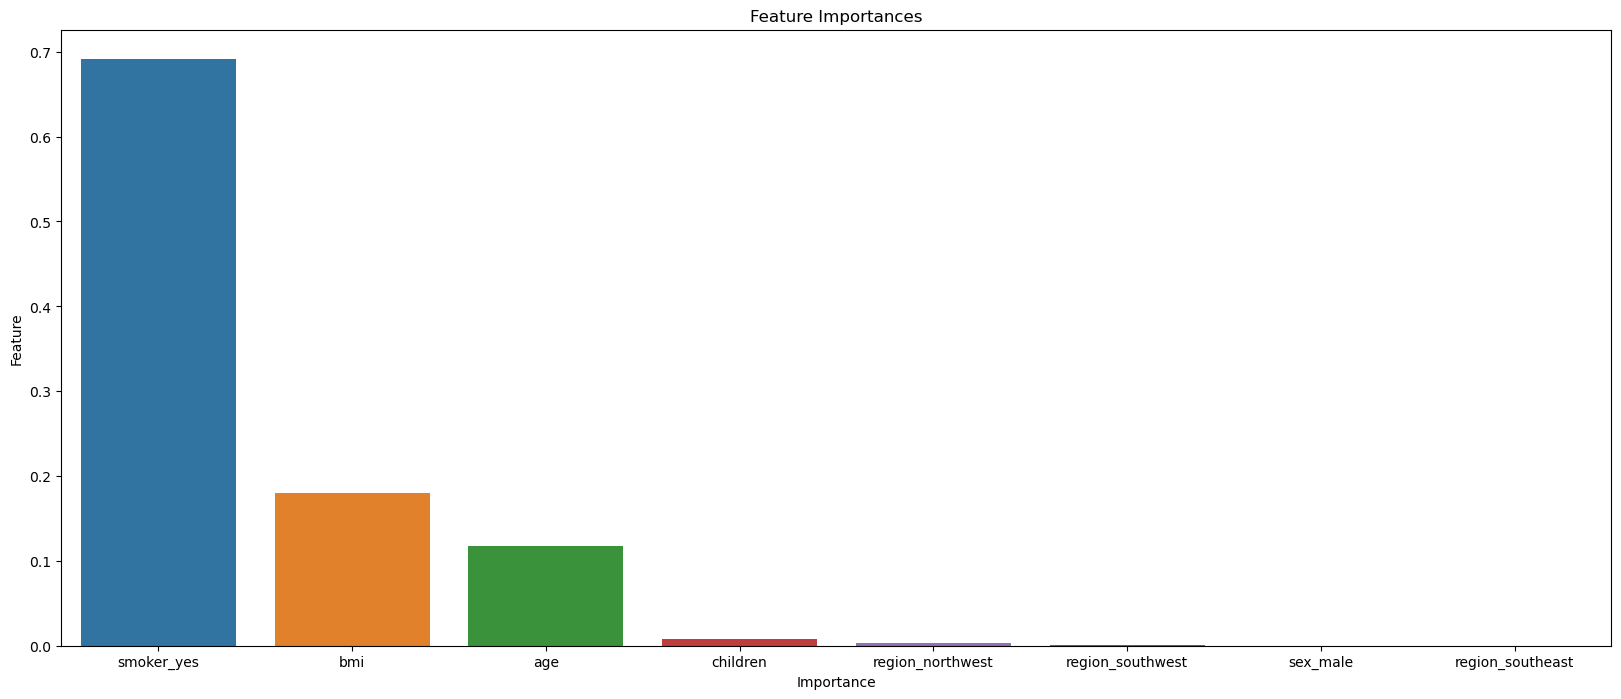

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': train_inputs.columns,
    'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(20, 8))
sns.barplot(y='Importance', x='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Conclusion

* Through our analysis, it has been determined that the most influential factors affecting charges are an individual's `sex` and `BMI` (Body Mass Index). These variables have exhibited a substantial impact on the predicted charges within our model.

* Furthermore, while the number of `children` does exert some influence on charges, its effect is comparatively modest when contrasted with the influence of sex and BMI.